# QUANT DEV - CASE STUDY
Get the data of daily close price for following coins </br>

 - Bitcoin, Ethereum, Cardano, Solana and Polkadot using the sample API below-


In [3]:
import json
import requests
import pandas as pd

urlDict = {
    'BTC': 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=1095',
    'ETH': 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1095',
    'ADA': 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ADA&tsym=USD&limit=1095',
    'SOL': 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=SOL&tsym=USD&limit=1095',
    'DOT':  'https://min-api.cryptocompare.com/data/v2/histoday?fsym=DOT&tsym=USD&limit=1095'
}


BTC = requests.get(urlDict['BTC']).json()
ETH = requests.get(urlDict['ETH']).json()
ADA = requests.get(urlDict['ADA']).json()
SOL = requests.get(urlDict['SOL']).json()
DOT = requests.get(urlDict['DOT']).json()


In [93]:
btcFrame = pd.DataFrame(BTC['Data']['Data'])
ethFrame = pd.DataFrame(ETH['Data']['Data'])
adaFrame = pd.DataFrame(ADA['Data']['Data'])
solFrame = pd.DataFrame(SOL['Data']['Data'])
dotFrame = pd.DataFrame(DOT['Data']['Data'])

btcFrame = btcFrame.assign(Symbol='btc')
ethFrame = ethFrame.assign(Symbol='eth')
adaFrame = adaFrame.assign(Symbol='ada')
solFrame = solFrame.assign(Symbol='sol')
dotFrame = dotFrame.assign(Symbol='dot')


In [94]:
from datetime import datetime
# print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
btcFrame['Date'] = btcFrame['time'].apply(
    lambda x: datetime.strptime(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'), '%Y-%m-%d'))
btcFrame.set_index("Date", inplace=True)

ethFrame['Date'] = ethFrame['time'].apply(
    lambda x: datetime.strptime(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'), '%Y-%m-%d'))
ethFrame.set_index("Date", inplace=True)

adaFrame['Date'] = adaFrame['time'].apply(
    lambda x: datetime.strptime(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'), '%Y-%m-%d'))
adaFrame.set_index("Date", inplace=True)

solFrame['Date'] = solFrame['time'].apply(
    lambda x: datetime.strptime(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'), '%Y-%m-%d'))
solFrame.set_index("Date", inplace=True)

dotFrame['Date'] = dotFrame['time'].apply(
    lambda x: datetime.strptime(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'), '%Y-%m-%d'))
dotFrame.set_index("Date", inplace=True)


In [95]:
btcFrame['Daily Return'] = btcFrame['close'].pct_change(1)
ethFrame['Daily Return'] = ethFrame['close'].pct_change(1)
adaFrame['Daily Return'] = adaFrame['close'].pct_change(1)
solFrame['Daily Return'] = solFrame['close'].pct_change(1)
dotFrame['Daily Return'] = btcFrame['close'].pct_change(1)


In [96]:
btcFrame.sort_values(by='Date')
ethFrame.sort_values(by='Date')
adaFrame.sort_values(by='Date')
solFrame.sort_values(by='Date')
dotFrame.sort_values(by='Date')
btcFrame.head(5)


,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,Symbol,Daily Return
Date,,,,,,,,,,,
2019-11-03,1572739200,9396.10,9108.22,9311.99,15670.30,1.446628e+08,9221.61,direct,,btc,NaN
2019-11-04,1572825600,9578.74,9141.00,9221.61,29435.09,2.759237e+08,9421.54,direct,,btc,0.021681
2019-11-05,1572912000,9495.36,9196.64,9421.54,24971.55,2.334913e+08,9323.61,direct,,btc,-0.010394
2019-11-06,1572998400,9455.53,9269.82,9323.61,22338.76,2.089854e+08,9347.27,direct,,btc,0.002538
2019-11-07,1573084800,9382.63,9114.14,9347.27,21322.07,1.968796e+08,9208.52,direct,,btc,-0.014844


In [97]:
def Monthly_Return(df, name):
  stock_return = df['close']
  stock_return_pct_change = stock_return.pct_change()
  stock_return_pct_change = stock_return_pct_change[1:]
  stock_return_monthly = pd.DataFrame(
      stock_return_pct_change.resample('M').agg(lambda x: (x+1).prod() - 1))
  stock_return_monthly.rename(columns={'close': name}, inplace=True)
  return stock_return_monthly


In [98]:
stock_return = Monthly_Return(btcFrame, 'BTC')
stock_return = stock_return.join(Monthly_Return(ethFrame, 'ETH'))
stock_return = stock_return.join(Monthly_Return(adaFrame, 'ADA'))
stock_return = stock_return.join(Monthly_Return(solFrame, 'SOL'))
stock_return = stock_return.join(Monthly_Return(dotFrame, 'DOT'))
stock_return = stock_return[stock_return.index >= f"2021-01-01"]
stock_return


,BTC,ETH,ADA,SOL,DOT
Date,,,,,
2021-01-31,0.143958,0.782785,0.900936,1.823179,0.740397
2021-02-28,0.365620,0.082485,2.807180,2.065916,1.096714
2021-03-31,0.298994,0.349014,-0.093536,0.485845,0.095801
2021-04-30,-0.017618,0.446506,0.135906,1.207518,-0.014031
2021-05-31,-0.354360,-0.024705,0.285081,-0.235363,-0.361522
2021-06-30,-0.059919,-0.159283,-0.204598,0.083893,-0.297900
2021-07-31,0.183086,0.112300,-0.047688,0.034056,0.025031
2021-08-31,0.137060,0.356836,1.102428,1.948830,0.867778
2021-09-30,-0.070610,-0.126439,-0.236377,0.304412,-0.088010


In [99]:
# def Buy(df):
#     return ()


for ind in stock_return.index:
    max_return_stock = pd.DataFrame(stock_return.idxmax(axis=1))
    min_return_stock = pd.DataFrame(stock_return.idxmin(axis=1))
stock_return = stock_return.join(max_return_stock)
stock_return.rename(columns={0: 'MAX_ReturnStock'}, inplace=True)
stock_return = stock_return.join(min_return_stock)
stock_return.rename(columns={0: 'MIN_ReturnStock'}, inplace=True)
stock_return


,BTC,ETH,ADA,SOL,DOT,MAX_ReturnStock,MIN_ReturnStock
Date,,,,,,,
2021-01-31,0.143958,0.782785,0.900936,1.823179,0.740397,SOL,BTC
2021-02-28,0.365620,0.082485,2.807180,2.065916,1.096714,ADA,ETH
2021-03-31,0.298994,0.349014,-0.093536,0.485845,0.095801,SOL,ADA
2021-04-30,-0.017618,0.446506,0.135906,1.207518,-0.014031,SOL,BTC
2021-05-31,-0.354360,-0.024705,0.285081,-0.235363,-0.361522,ADA,DOT
2021-06-30,-0.059919,-0.159283,-0.204598,0.083893,-0.297900,SOL,DOT
2021-07-31,0.183086,0.112300,-0.047688,0.034056,0.025031,BTC,ADA
2021-08-31,0.137060,0.356836,1.102428,1.948830,0.867778,SOL,BTC
2021-09-30,-0.070610,-0.126439,-0.236377,0.304412,-0.088010,SOL,ADA


In [109]:

stock_return = stock_return.assign(Income=0)
stock_return = stock_return.assign(StrategyReturn=0)
stock_return


,BTC,ETH,ADA,SOL,DOT,MAX_ReturnStock,MIN_ReturnStock,Income,StrategyReturn
Date,,,,,,,,,
2021-01-31,0.143958,0.782785,0.900936,1.823179,0.740397,SOL,BTC,0,0
2021-02-28,0.365620,0.082485,2.807180,2.065916,1.096714,ADA,ETH,0,0
2021-03-31,0.298994,0.349014,-0.093536,0.485845,0.095801,SOL,ADA,0,0
2021-04-30,-0.017618,0.446506,0.135906,1.207518,-0.014031,SOL,BTC,0,0
2021-05-31,-0.354360,-0.024705,0.285081,-0.235363,-0.361522,ADA,DOT,0,0
2021-06-30,-0.059919,-0.159283,-0.204598,0.083893,-0.297900,SOL,DOT,0,0
2021-07-31,0.183086,0.112300,-0.047688,0.034056,0.025031,BTC,ADA,0,0
2021-08-31,0.137060,0.356836,1.102428,1.948830,0.867778,SOL,BTC,0,0
2021-09-30,-0.070610,-0.126439,-0.236377,0.304412,-0.088010,SOL,ADA,0,0


In [121]:
from datetime import datetime, timedelta
stock_dict = {
    'BTC': btcFrame,
    'ETH': ethFrame, 
    'ADA': adaFrame,
    'SOL': solFrame,
    'DOT': dotFrame,
}
# def Buy(stock_name):
# '''  
for ind in stock_return.index[:-2]:
    # print(ind.date())
    income = 0
    date_now = ind
    date_till = ind + timedelta(days=30)
    
    
    #buy stock
    buy_stock = stock_return.loc[ind]['MAX_ReturnStock']
    price_now_b = stock_dict[buy_stock].loc[date_now]['close']
    price_till_b = stock_dict[buy_stock].loc[date_till]['close']
    income = price_till_b - price_now_b
    
    
    # sell stock
    sell_stock = stock_return.loc[ind]['MIN_ReturnStock']
    price_now_s = stock_dict[sell_stock].loc[date_now]['close']
    price_till_s = stock_dict[sell_stock].loc[date_till]['close']
    income += (price_now_s - price_till_s)
    stock_return.loc[ind,'Income'] = income
    stock_return.loc[ind, 'StrategyReturn'] = income/(price_now_b+price_now_s)
    
    
stock_return


,BTC,ETH,ADA,SOL,DOT,MAX_ReturnStock,MIN_ReturnStock,Income,StrategyReturn
Date,,,,,,,,,
2021-01-31,0.143958,0.782785,0.900936,1.823179,0.740397,SOL,BTC,-15348.2730,-0.463030
2021-02-28,0.365620,0.082485,2.807180,2.065916,1.096714,ADA,ETH,-418.9220,-0.294208
2021-03-31,0.298994,0.349014,-0.093536,0.485845,0.095801,SOL,ADA,23.2880,1.129827
2021-04-30,-0.017618,0.446506,0.135906,1.207518,-0.014031,SOL,BTC,22081.1100,0.382021
2021-05-31,-0.354360,-0.024705,0.285081,-0.235363,-0.361522,ADA,DOT,6.5940,0.263024
2021-06-30,-0.059919,-0.159283,-0.204598,0.083893,-0.297900,SOL,DOT,-2.5800,-0.049701
2021-07-31,0.183086,0.112300,-0.047688,0.034056,0.025031,BTC,ADA,5517.1720,0.133021
2021-08-31,0.137060,0.356836,1.102428,1.948830,0.867778,SOL,BTC,3362.9000,0.071146
2021-09-30,-0.070610,-0.126439,-0.236377,0.304412,-0.088010,SOL,ADA,54.7510,0.381710


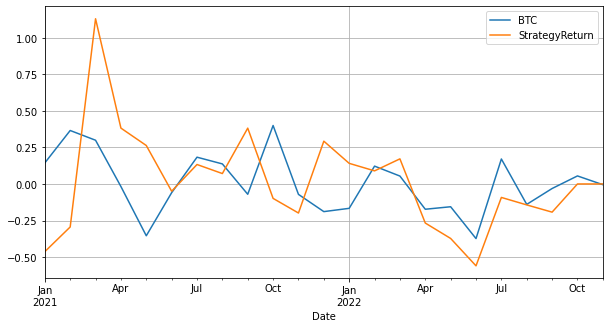

In [122]:
import matplotlib.pyplot as plt


graph = stock_return[['BTC', 'StrategyReturn']]
graph.plot(figsize=(10, 5), grid=True)
# stock_return['Date']
plt.show()

Discuss the strategy performance and any suggestions to improve it

Answer:

While we do see the strategy sometimes underperformed compared to BTC
But we do also see huge spikes for certain periods.
Overall as per my analysis the strategy beat the BTC.

My suggestion would be to take care of the downside risk .
This will give us stable returns (might be less returns) and reduce the overall volatility.
